<a href="https://colab.research.google.com/github/Kazureee/Python-Lessons/blob/main/K_Means_Clustering_Activity%20CORRECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/iris.csv')

df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
scalar = StandardScaler()
scalar.fit(df[['petal_length']])
df[['petal_length_T']] = scalar.transform(df[['petal_length']])

scalar.fit(df[['petal_width']])
df[['petal_width_T']] = scalar.transform(df[['petal_width']])


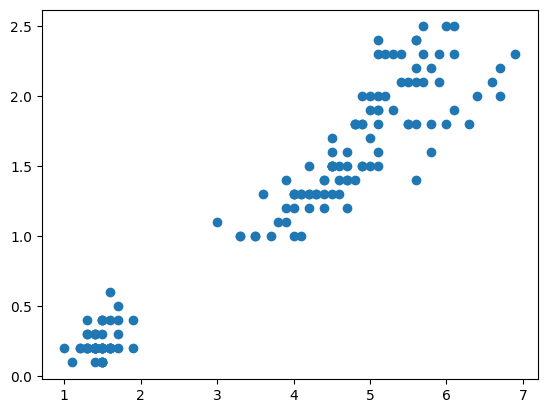

In [ ]:
plt.scatter(df['petal_length'] , df['petal_width'])

In [ ]:
km = KMeans (n_clusters = 3)
y_predicted = km.fit_predict(df[['petal_length_T' , 'petal_width_T']])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
df['cluster'] = y_predicted
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,petal_length_T,petal_width_T,cluster,predicted_iris_type
0,5.1,3.5,1.4,0.2,setosa,-1.341272,-1.312977,0,versicolor
1,4.9,3.0,1.4,0.2,setosa,-1.341272,-1.312977,0,versicolor
2,4.7,3.2,1.3,0.2,setosa,-1.398138,-1.312977,0,versicolor
3,4.6,3.1,1.5,0.2,setosa,-1.284407,-1.312977,0,versicolor
4,5.0,3.6,1.4,0.2,setosa,-1.341272,-1.312977,0,versicolor


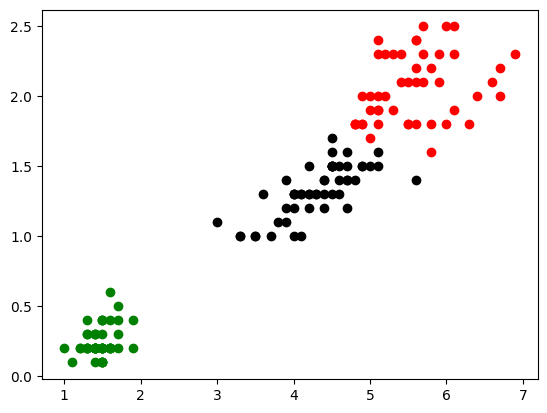

In [ ]:
# Create separate DataFrames for each cluster
df1 = df[df['cluster'] == 0]  # DataFrame for cluster 0
df2 = df[df['cluster'] == 1]  # DataFrame for cluster 1
df3 = df[df['cluster'] == 2]  # DataFrame for cluster 2

# Create a scatter plot for each cluster with different colors
plt.scatter(df1['petal_length'], df1['petal_width'], color='green')  # Cluster 0 in green
plt.scatter(df2['petal_length'], df2['petal_width'], color='red')    # Cluster 1 in red
plt.scatter(df3['petal_length'], df3['petal_width'], color='black')   # Cluster 2 in black

In [ ]:
def predict_iris_type(cluster):
    cluster_mapping = {
        0: 'versicolor',
        1: 'setosa',
        2: 'virginica'
    }
    return cluster_mapping.get(cluster, 'Unknown')

df['predicted_iris_type'] = df['cluster'].apply(predict_iris_type)

df

,sepal_length,sepal_width,petal_length,petal_width,species,petal_length_T,petal_width_T,cluster,predicted_iris_type
0,5.1,3.5,1.4,0.2,setosa,-1.341272,-1.312977,0,versicolor
1,4.9,3.0,1.4,0.2,setosa,-1.341272,-1.312977,0,versicolor
2,4.7,3.2,1.3,0.2,setosa,-1.398138,-1.312977,0,versicolor
3,4.6,3.1,1.5,0.2,setosa,-1.284407,-1.312977,0,versicolor
4,5.0,3.6,1.4,0.2,setosa,-1.341272,-1.312977,0,versicolor
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0.819624,1.447956,1,setosa
146,6.3,2.5,5.0,1.9,virginica,0.705893,0.922064,1,setosa
147,6.5,3.0,5.2,2.0,virginica,0.819624,1.053537,1,setosa
148,6.2,3.4,5.4,2.3,virginica,0.933356,1.447956,1,setosa


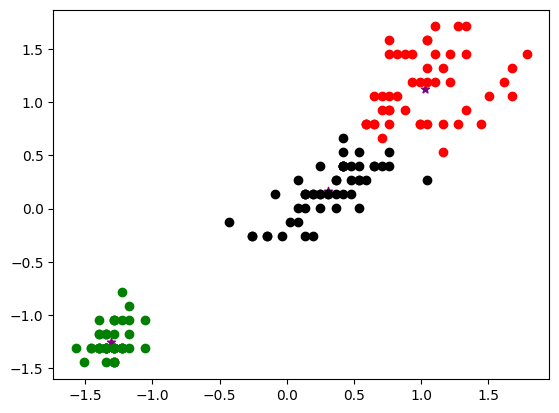

In [ ]:
km.cluster_centers_

# Create separate DataFrames for each cluster
df1 = df[df['cluster'] == 0]  # DataFrame for cluster 0
df2 = df[df['cluster'] == 1]  # DataFrame for cluster 1
df3 = df[df['cluster'] == 2]  # DataFrame for cluster 2

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker="*")

# Create a scatter plot for each cluster with different colors
plt.scatter(df1['petal_length_T'], df1['petal_width_T'], color='green')  # Cluster 0 in green
plt.scatter(df2['petal_length_T'], df2['petal_width_T'], color='red')    # Cluster 1 in red
plt.scatter(df3['petal_length_T'], df3['petal_width_T'], color='black')   # Cluster 2 in black


In [ ]:
count = df['cluster'].value_counts() # Use value_counts() to get the frequency of each unique value
count

,count
cluster,
2,52
0,50
1,48


In [ ]:
c
